Before you submit this assignment, make sure everything runs as you expect it to.  
* **restart the kernel** (in the menubar, select Kernel -> Restart)
* **run all cells** (in the menubar, select Cell -> Run All)

Make sure to fill in any place that says 
```python
# YOUR CODE HERE
### Put your plot-code here:
```
and fill in your name (and of your fellow students, if you submit together), and according matriculation number below. If you are more than one student, separate by a comma **,**

In [1]:
NAME = "Kittiphon Boonma and David Ecclestone"
MATNUM = "352210, "

# Assignment 1: 
# Aquifer pumping test

Pumping tests are hydraulic tests that are frequently used to estimate hydraulic parameters in a fluid-controlled system. In this exercise, we will evaluate the distribution of drawdown (as a measure of pressure decrease) in a groundwater aquifer due to a pumping test.


During pumping tests, fluid is pumped from the aquifer at a constant rate $Q$ for a time $t$. 

Note: in this (simple) case, the water level in the aquifer itself is not changed - only the "hydraulic head" (as a measure of the water pressure) is affected! We will come back to this point in the lecture at a later stage.

## Write a function to calculate head drawdown 
##### (5 points)

Using the information given in the assignment pdf, set up a Python function with the name *drawdown*. This function should calculate the drawdown of the hydraulic head according to the **Theis equation**:

$$ s(r,t) = \frac{Q}{4 \pi T}W(u) $$

For the parameters needed, use these values (also in the pdf):

| Parameter | value | unit |
|-----------|-------|------|
| Q:        |$10^{-5}$ | [m$^{3}$/s]|
| T: | $10^{-5}$ |[m$^{2}$/s]|
| S: | $10^{-4}$ |[-]|
| h$_{0}$:  | 100 | [m]|


In [6]:
# use this cell to import further needed libraries. 
#But generally, these should suffice.
import scipy.special
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

#from IPython.core.display import HTML
#css_file = 'nre2_style.css'
#HTML(open(css_file,'r').read())

In [7]:
Q_default = 1e-5
T_default = 1e-5
S_default = 1e-4
def drawdown(t, r, T=T_default, S=S_default, Q=Q_default):
    """
    calculate drawdown due to pumping at distance r for time t
    """
    # YOUR CODE HERE!
           
     
            #1) Calculate u
    u = (r**2)*S/(4*T*t)
    
            #2) Calculate W(u)
    #W = - scipy.special.expi(u) - 0.5772 - np.log(u)   
    W = -0.5772 - np.log(u) + u - u**2/(2*np.math.factorial(2)) \
        +u**3/(3*np.math.factorial(3)) - u**4/(4*np.math.factorial(4))
    
    
            #3) Calculate drawdown (s)
    s = Q/(4*np.pi*T) * W

            
    return s 

#r = np.linspace(0.1,10,10)
#r=10
#print np.round(drawdown(36000,r,T=T_default,S=S_default,Q=Q_default),7)

The result of your function should be rounded to the 7th decimal place.
You can use numpy's round function for that.
```python
np.round(x,i_th_decimal_place)

Your function should return 0.3501047 for **$t=$10 hours**, and **$r=$10 m**.  
Also test it with **$t = $1 year** and **$r = $100 m**. The result should give 0.5223693.

In [17]:
"""
Check if a correct value for a single t and a single distance is returned
"""
from numpy.testing import assert_approx_equal
assert_approx_equal(drawdown(36000,10,T=T_default,S=S_default,Q=Q_default),0.3501047)
assert_approx_equal(np.round(drawdown(31557600,100,T=T_default,S=S_default,Q=Q_default),7),0.5223693)

In [18]:
"""
Check if a correct value for a single t and an array r is returned
"""
from nose.tools import assert_equal
from numpy.testing import assert_array_equal
rc = np.linspace(0.1,10,10)
assert_array_equal(np.round(drawdown(36000,rc,T=T_default,S=S_default,Q=Q_default),5), [1.08249, 0.68701, 0.58349, 0.52131, 0.47675, 0.44201, 0.41354, 0.38943, 0.36854, 0.3501])

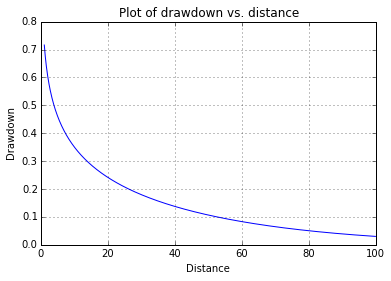

In [10]:
# YOUR CODE HERE
import numpy as np
r=np.arange(1,100,0.1)
t=36000
s=drawdown(t, r, T=T_default, S=S_default, Q=Q_default)

plt.plot(r,s)
plt.xlabel("Distance")
plt.ylabel("Drawdown")
plt.title("Plot of drawdown vs. distance")
plt.grid(True)
plt.savefig("drawdown-distance.png")

## Determine the hydraulic head in an (x,y)-plane
##### (10 points)

Use the function contourf for creating a plot of filled contours for the calculated heads.  
*(Hint: Use numpy methods for an efficient implementation)*  

Remember using the distance field you calculated in exercise 3. This can directly be used to calculate the drawdown for the entire field.  
Once you determined the drawdown at each location, use Equation 5 of the accompanying PDF to calculate the resulting hydraulic head (with an initial head value of h$_0$ = 100 m).  

Don't forget to add title, axes labels, and a colorbar to get full points!  


### First Step:
Write a function to calculate the distance field ranging from -100 m to 100 m in 1 m increments.
Use the results of that function to calculate the resulting hydraulic head.

In [11]:
def distance_field(a,b,incr):
    """
    get a grid of a, b dimensions with incr - discretization.
    Input:
    a = list / array, containing [amin amax]
    b = list / array, containing [bmin bmax]
    incr = float, size of increment
    
    Output:
    X,Y = gridded mesh
    """
    # YOUR CODE HERE
    
  
    x  = np.arange(a[0],a[1],incr)
    y  = np.arange(b[0],b[1],incr)
    
    (X, Y) = np.meshgrid(x, y)
    
    return (X,Y)


#(X,Y)=distance_field([-99.5,99.5],[-99.5,99.5],1)  #test

In [12]:
"""
Check if a correct distance field is returned
"""
from numpy.testing import assert_array_equal
assert_array_equal(distance_field([-99.5,99.5],[-99.5,99.5],1)[0][0],[-99.5, -98.5, -97.5, -96.5, -95.5, -94.5, -93.5, -92.5, -91.5,
       -90.5, -89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5,
       -81.5, -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5,
       -72.5, -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5,
       -63.5, -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5,
       -54.5, -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5,
       -45.5, -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5,
       -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5,
       -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5,
       -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,
        -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
         8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
        17.5,  18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,
        26.5,  27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,
        35.5,  36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,
        44.5,  45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,
        53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,
        62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,
        71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,
        80.5,  81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,
        89.5,  90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5])
assert_array_equal(distance_field([-99.5,99.5],[-99.5,99.5],1)[1][100],0.5*np.ones(199,))

In [13]:
"""
Check if a resulting hydraulic head is correct
"""
from numpy.testing import assert_array_equal, assert_approx_equal, assert_almost_equal
X,Y = distance_field([-99.5,99.5],[-99.5,99.5],1)
r = np.sqrt(X**2+Y**2)
h = np.ones_like(X)*100
h -= drawdown(36000.,r,T_default,S_default,Q_default)
assert_approx_equal(h[1,50],99.9772)
assert_approx_equal(h[1,1],99.99047)
assert_approx_equal(np.min(h),99.22881)

### Second step  
Create a 2D contour polot of the hydraulic head (*not* drawdown!).  
Add a colorbar, add a plot title, and label axes correctly to get all points. 

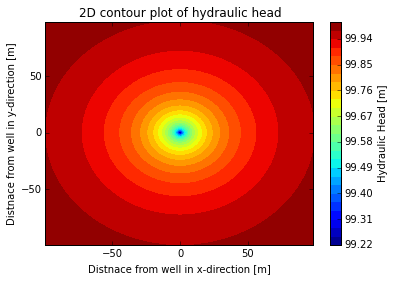

In [14]:
# YOUR CODE HERE

(X,Y) = distance_field([-99.5,99.5],[-99.5,99.5],1)
r = np.sqrt(X**2 + Y**2)

#set original point to NaN to avoid taking log(0) in W(u) equation
#r[r==0] = float('NaN') 

#time= 10 hours
t=36000.


h = np.ones_like(X)*100
h -= drawdown(t,r,T_default,S_default,Q_default)



#make 2D contour plot of hydraulic head
n=25
plt.contourf(X, Y, h, n)
cbar = plt.colorbar()
cbar.set_label("Hydraulic Head [m]")
plt.title('2D contour plot of hydraulic head')
plt.xlabel('Distnace from well in x-direction [m]')
plt.ylabel('Distnace from well in y-direction [m]')

### Third step
Create a perspective plot (as learned in Exercise 3) of the hydraulic head.

In [ ]:
# YOUR CODE HERE

import colormaps as cmaps
plt.register_cmap(name='viridis', cmap=cmaps.viridis)
plt.set_cmap(cmaps.viridis)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, h, 
                  rstride = 5,
                  cstride = 5)  
#ax.view_init(30,50)
ax.set_xlabel("x-values [m]")
ax.set_ylabel("y-values [m]")
ax.set_zlabel("Hydraulic head [m]")
ax.set_title("Perspective plot of Hadraulic Head, fn.(distance from well)")

## Bonus: analyse combined effect of two pumping wells
##### (5 points)
In this bonus exercise, you'll assess the effect of two neighbouring wells.  
Using the *principle of superposition*, you can calculate the resulting effect of simultaneous pumping in several wells.  

*Reminder:* The *principle of superposition* states that the sum of two (or more) solutions to the equation (with different boundary conditions) is also a solution.  

Ideally, include now the distance between two wells as an additional variable, $d$, to be able to test different well-distances (e.g. 10 m, 50 m, 100 m).  

### First step: 
In our case, you can simply add the effect of both wells to obtain the overall drawdown in the system.  
That means, that you have to create two distance fields (one for each well).  

The grid of the distance fields should be a rectangular area (x: 400 m, i.e. [-200 200]; y: 200 m, i.e. [-100 100]), with 2 m increments.  
You can use your function distance_field for this.

---
### Second step: 
Use the created distance fields to calculate the drawdown for each field and then add the result.

---

### Third step: 
Create a contour-plot (**contourf**) to visualise the effect of two pumping wells.  
Plot the resulting hydraulic head field (not drawdown!) for a well distance of **50 m**.
Again, don't forget axes labels, title, and a colorbar.  
Save the figure with **plt.savefig('drawdown_2wells.png')**. Again, you do not have to send the figures, just the notebook!

C:\Users\Kittiphon\Anaconda\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in power


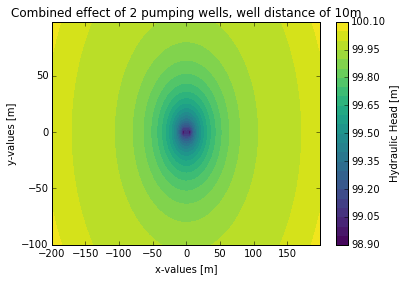

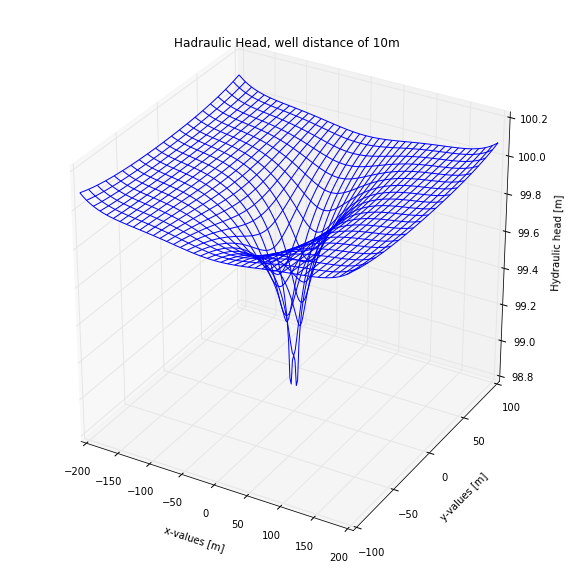

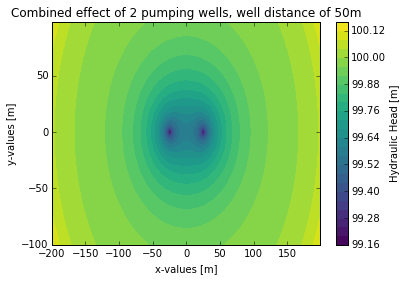

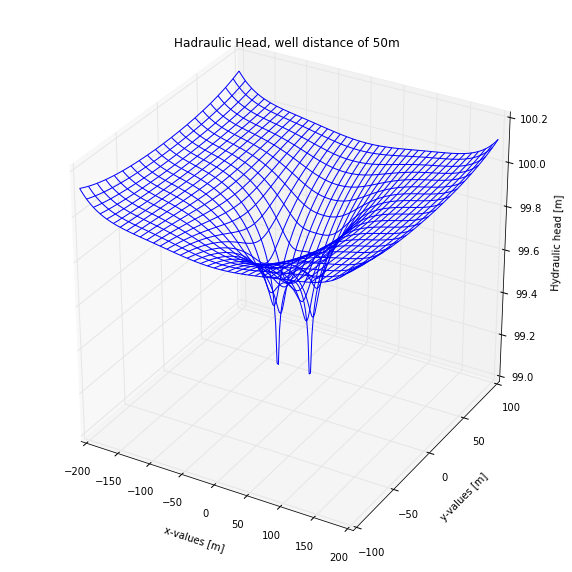

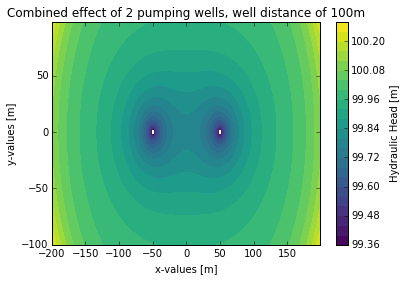

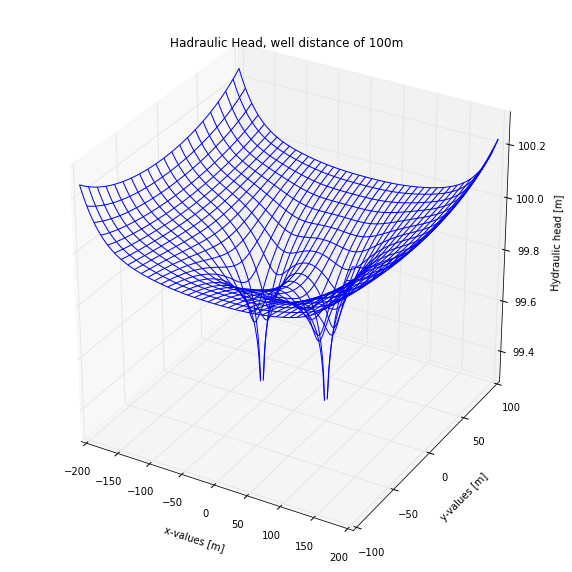

In [16]:
# YOUR CODE HERE
d = [10,50,100]
t = 36000.

for i in range(0,len(d)):

    (X1,Y1) = distance_field([-200,200],[-100,100],2)
    r1 = np.sqrt((X1-(d[i]/2))**2 + Y1**2)
    r1[r1==0] = float('NaN') 
    #h = np.ones_like(X1)*100
    #h -= drawdown(t,r1,T_default,S_default,Q_default)

    (X2,Y2) = distance_field([-200,200],[-100,100],2)
    r2 = np.sqrt((X2+(d[i]/2))**2 + Y2**2)
    r2[r2==0] = float('NaN')
    #h = np.ones_like(X2)*100
    #h -= drawdown(t,r2,T_default,S_default,Q_default)

    #calculate drawdown
    s1 = drawdown(t, r1, T=T_default, S=S_default, Q=Q_default)
    s2 = drawdown(t, r2, T=T_default, S=S_default, Q=Q_default)
    s = s1 + s2 # Apply principle of superposition
    h0 = 100
    h = h0 - s


    #creat plots
    n=25
    plt.figure()
    plt.contourf(X1,Y1,h,n)
    cbar = plt.colorbar()
    cbar.set_label("Hydraulic Head [m]")
    plt.title("Combined effect of 2 pumping wells, well distance of "+str(d[i]) +"m")
    plt.xlabel('x-values [m]')
    plt.ylabel('y-values [m]')
    plt.savefig("contour_drawdown_2wells_"+str(d[i])+"m.png")
    
    plt.figure()
    #subnum = '1'+str(len(d))+str(i)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(X1, Y1, h, 
                  rstride = 5,
                  cstride = 5) 
    #ax.view_init(10,90)
    ax.set_xlabel("x-values [m]")
    ax.set_ylabel("y-values [m]")
    ax.set_zlabel("Hydraulic head [m]")
    ax.set_title("Hadraulic Head, well distance of "+str(d[i]) +"m")
    plt.savefig("drawdown_2wells_"+str(d[i])+"m.png")

In [48]:
import scipy.special

In [49]:
scipy.special.expi??